In [2]:
import xarray as xr
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import skill_metrics as sm

2020.12.02<br>
计算空间的泰勒图诸要素,与对时间序列的处理相似

In [3]:
# year = ["2003","2004","2005","2006","2007","2008","2009"]
year = ["2004","2005","2006","2007","2008"]
months = ["4","5","6","7","8"]
year_stats = {} # 当年的统计量
for year_ind in year:
    # xarray 读取数据
    diri = "/m2data2/yycheng/yycheng/MPAS/92-25km_VR_"+year_ind+"/postprocess/temp_data/"
    fili = year_ind+"_daily_precip_combine_CMORPH_MPAS.nc"
    ds_disk = xr.open_dataset(diri + fili)
    precip_obs = ds_disk["precip_CMORPH"]
    precip_mod = ds_disk["precip_MPAS"]
    # 计算逐年05-08序列
    year_obs_mean = precip_obs.mean(dim=["time"])
    year_mod_mean = precip_mod.mean(dim=["Time"])
    # nd to one d
    year_stats[year_ind] = sm.taylor_statistics( np.array(year_mod_mean).ravel() , np.array(year_obs_mean).ravel() )
    # 拆分逐月，计算统计量
    # month_stats = {} # 逐月的统计量
        #  taylor_stats1.append( sm.taylor_statistics(np.array(obs_mean),np.array(mod_mean)) )
        # months_obs_mean = year_obs_mean.sel(time = slice(year_ind+"-"+month_ind))
        # months_mod_mean = year_mod_mean.sel(Time = slice(year_ind+"-"+month_ind)) # MPAS中奇怪的时间坐标名称Time
        # month_stats[month_ind] = sm.taylor_statistics(np.array(months_obs_mean),np.array(months_mod_mean))
    # 逐月合并进逐年
    # year_stats[year_ind] = sm.taylor_statistics


In [4]:
year_select = ["2004","2005","2006","2007","2008"]
# months = ["4","5","6","7","8"]
months = ['8']
rmsd_select_year='2004'

sdev  = []
crmsd = []
ccoef = []
sdev_obs = []
# statistics can be normalized
# obs sdev=1 crmsd=0 ccoef=1
#----- normilized -----
sdev.append(year_stats[rmsd_select_year]['sdev'][0]/year_stats[rmsd_select_year]['sdev'][0])
crmsd.append(year_stats[rmsd_select_year]['crmsd'][0]/year_stats[rmsd_select_year]['sdev'][0])
ccoef.append(year_stats[rmsd_select_year]['ccoef'][0])
#----- origin     -----
# sdev.append(year_stats[rmsd_select_year]['sdev'][0])
# crmsd.append(year_stats[rmsd_select_year]['crmsd'][0])
# ccoef.append(year_stats[rmsd_select_year]['ccoef'][0])
for year_ind in year_select:

    # print( year_stats[year_ind][select_month]['sdev'][1] )
    # for i in year_stats[year_ind]:
    # # taylor_stats1[:]["ccoef"]
    #     # print(i['crmsd'][1])
    # for month_ind in months:

#----- normilized -----
    sdev.append(year_stats[year_ind]['sdev'][1]/year_stats[year_ind]['sdev'][0])
    crmsd.append(year_stats[year_ind]['crmsd'][1]/year_stats[year_ind]['sdev'][0])
    ccoef.append(year_stats[year_ind]['ccoef'][1])

#----- origin     -----
    # sdev.append(year_stats[year_ind]['sdev'][1])
    # crmsd.append(year_stats[year_ind]['crmsd'][1])
    # ccoef.append(year_stats[year_ind]['ccoef'][1])
        # sdev_obs.append(i['sdev'][0])
    
sdev  = np.array(sdev)
crmsd = np.array(crmsd)
ccoef = np.array(ccoef)

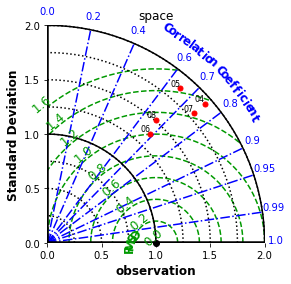

In [5]:
intervalsCOR = np.concatenate((np.arange(0,1.0,0.2), [0.7,0.9, 0.95, 0.99, 1]))

ax = sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = ["obs","04","05","06","07","08"], 
                    tickRMS = np.arange(0,1.8,0.2), tickRMSangle = 130, 
                    # colRMS = 'm', styleRMS = ':', widthRMS = 2.0,
                    tickCOR = intervalsCOR,
                    tickSTD = np.arange(0,2.25,0.25), axismax = 2.0, 
                    showlabelsSTD = 'on',
                    rmslabelformat = ':.1f',
                    styleOBS = '-', 
                    colOBS = 'k',
                    markerobs = 'o', 
                    titleOBS = 'observation')
plt.title("space")
output_pic_path = "/m2data2/yycheng/playground/MPAS_case_study/case_template/92-25km_vr_case_postprocess/visualization/check_cmorph_vr/output_pic/taylor/taylor_space/"
plt.savefig(output_pic_path + "taylor_2003-2009_space",dpi=300)
del(ax)